# Анализ рекламных источников

**Задача**:

Проанализировать поведение игроков в зависимости от источника перехода:
- Провести исследовательский анализ данных;
- Проанализировать влияние источника перехода в игру на поведение пользователя;
- Проверить статистические гипотезы.

**Описание датасетов:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_cost.csv*:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

##  Загрузка данных и изучение общей информации.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv')
user_source = pd.read_csv('/datasets/user_source.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [4]:
def get_info(dataframes):
    for df in dataframes:
        #print(df.name)
        print('Вызов метода head()') 
        display(df.head())
        print()
        print('Вызов метода info()') 
        df.info()
        print()
        print('Вызов метода describe()')
        display(df.describe().T)
        print()
        print('Вывод метода value_counts()', df.value_counts())       

In [5]:
dataframes = [game_actions, user_source, ad_costs]

In [6]:
get_info(dataframes)

Вызов метода head()


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN



Вызов метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB

Вызов метода describe()


,count,unique,top,freq
event_datetime,135640,128790,2020-05-07 17:57:40,4
event,135640,3,building,127957
building_type,127957,3,spaceport,59325
user_id,135640,13576,bf542075-e3a2-4e79-82d8-3838e86d2a25,22
project_type,1866,1,satellite_orbital_assembly,1866



Вывод метода value_counts() Series([], dtype: int64)
Вызов метода head()


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads



Вызов метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB

Вызов метода describe()


,count,unique,top,freq
user_id,13576,13576,eedd1161-679c-4f11-85bd-01e6e548c31b,1
source,13576,4,yandex_direct,4817



Вывод метода value_counts() user_id                               source                 
0001f83c-c6ac-4621-b7f0-8a28b283ac30  facebook_ads               1
a9ff93bd-0b96-4e89-bef7-c29326643faf  youtube_channel_reklama    1
aa08dc9a-f199-483d-aa43-2781abb889fc  instagram_new_adverts      1
aa0d0a62-0ba5-4d87-9467-4eb39d6b2d17  facebook_ads               1
aa122ae2-5e98-4d93-96dc-fdcf7016398e  facebook_ads               1
                                                                ..
53c5f5cc-975b-4be6-9a60-2a8fe0fc226f  instagram_new_adverts      1
53d146cf-1b2a-4038-8326-7900b021f418  yandex_direct              1
53d59f09-9745-4bdd-b6e5-56f98a5228d4  instagram_new_adverts      1
53d8dfd2-d601-461b-a4fd-890be5b45d27  yandex_direct              1
ffff69cc-fec1-4fd3-9f98-93be1112a6b8  facebook_ads               1
Length: 13576, dtype: int64
Вызов метода head()


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796



Вызов метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes

Вызов метода describe()


,count,mean,std,min,25%,50%,75%,max
cost,28.0,271.556321,286.86765,23.314669,66.747365,160.056443,349.034473,969.139394



Вывод метода value_counts() source                   day         cost      
facebook_ads             2020-05-03  935.882786    1
                         2020-05-04  548.354480    1
youtube_channel_reklama  2020-05-08  40.217907     1
                         2020-05-07  55.740645     1
                         2020-05-06  88.506074     1
                         2020-05-05  147.041741    1
                         2020-05-04  259.073224    1
                         2020-05-03  454.224943    1
yandex_direct            2020-05-09  42.779505     1
                         2020-05-08  62.961630     1
                         2020-05-07  114.429338    1
                         2020-05-06  180.917099    1
                         2020-05-05  308.232990    1
                         2020-05-04  554.651494    1
                         2020-05-03  969.139394    1
instagram_new_adverts    2020-05-09  46.775400     1
                         2020-05-08  71.578739     1
                      

В таблице `game_actions` видим проблему в столбце `event_datetime`, необходимо привести тип к формату даты. Также в столбце `building_type` 7683 пропущенных значения, а в `project_type` пропущены практически все.

Самым популярным событием у игроков является постройка объекта, это событие встречается 1237957 раз, а самый популярный тип постройки - космопорт (59325 раз). 

Таблица `user_source` на первый взгляд корректна. 

По таблице `ad_costs` можем сделать вывод, что у нас всего 4 рекламных источника: facebook_ads, youtube_channel_reklama, yandex_direct и instagram_new_adverts. В колонке с датой такжке наблюдается неправильный формат, изменим тип данных в ходе предобработки.

## Предобработка данных:

Названия столбцов всех таблиц корректны и соответствуют хорошему стилю. Приступим к предобработке.

### Изменение типов данных, пропущенные значения, дубликаты, пропуски.

#### Таблица game_actions

Для начала изменим тип данных в колонке с датой.

In [7]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


#### Обработка пропусков game_actions

В ходе изначального ознакомления с таблицей мы уже выяснили, что столбец `building_type` содержит 7683 пропуска, а `project_type` целых 133774. 

Посмотрим на этих пользователей.

In [8]:
nulls_ga = game_actions[game_actions['building_type'].isnull()]
nulls_ga.tail()

,event_datetime,event,building_type,user_id,project_type
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135639,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


In [9]:
nulls_ga['event'].value_counts()

finished_stage_1    5817
project             1866
Name: event, dtype: int64

In [10]:
nulls_ga['user_id'].nunique()

5817

Разберемся с пропусками в столбце `project_type`, которых не мало. Для игроков, завершивших первый уровень заменим значения на `victory` (победа над первым противником), для реализовавших проект - `satellite_orbital_assembly` , а для остальных заменим на `not_finished`. 

In [11]:
game_actions.loc[game_actions['event'] == 'finished_stage_1', 'project_type'] = 'victory'

game_actions.loc[game_actions['event'] == 'project', 'project_type'] = 'satellite_orbital_assembly'

game_actions['project_type'].fillna('not_finished', inplace=True)

In [12]:
nulls_ga['event'].value_counts()

finished_stage_1    5817
project             1866
Name: event, dtype: int64

Все пользователи, имеющие пропуски в столбце с типом постройки, закончили завершили первый уровень игры победив первого врага, либо завершив проект. Обработаем пропущенные значения, заменим их на no_buildings.

In [13]:
game_actions['building_type'].fillna('no_buildings', inplace=True)
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   135640 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    135640 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [14]:
game_actions.isna().sum()

event_datetime    0
event             0
building_type     0
user_id           0
project_type      0
dtype: int64

Пропуски обработаны. 

#### Обработка дубликатов game_actions

In [15]:
print('Всего дубликатов:', game_actions.duplicated().sum())
#print()
#print('Доля дубликатов', "{:.2%}".format(game_actions.duplicated().sum() / len(game_actions)))

Всего дубликатов: 1


Всего один дубликат, удалим его из нашей таблицы.

In [16]:
game_actions = game_actions.drop_duplicates().reset_index(drop=True)

In [17]:
#проверим
print('Всего дубликатов:', game_actions.duplicated().sum())

Всего дубликатов: 0


Предобработка `game_actions` проведена, таблица корректна.

### Таблица user_source 

In [18]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [19]:
print('Количество дубликатов:', user_source.duplicated().sum())
print()
print('Количество пропусков:', user_source.isna().sum())

Количество дубликатов: 0

Количество пропусков: user_id    0
source     0
dtype: int64


Таблица корректна. 

### Таблица ad_costs

In [20]:
ad_costs.info()
ad_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


Изменим тип данных в столбце с датой. 

In [21]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

Проверим наличие дубликатов и пропусков.

In [22]:
print('Количество дубликатов:', ad_costs.duplicated().sum())
print()
print('Количество пропусков:', ad_costs.isna().sum())

Количество дубликатов: 0

Количество пропусков: source    0
day       0
cost      0
dtype: int64


Пропусков и дублей нет, таблица корректна. 

##  Исследовательский анализ данных

### Число пользователей не завершивших игру и завершивших игру 

In [23]:
finish_or_not = game_actions.copy()
finish_or_not.loc[finish_or_not['project_type'] == 'victory', 'project_type'] = 'finish'
finish_or_not.loc[finish_or_not['project_type'] == "satellite_orbital_assembly", 'project_type'] = 'finish'

In [24]:
finish_or_not_pivot = finish_or_not.pivot_table(index='project_type', values='user_id', aggfunc='nunique').reset_index()
finish_or_not_pivot

,project_type,user_id
0,finish,5817
1,not_finished,13576


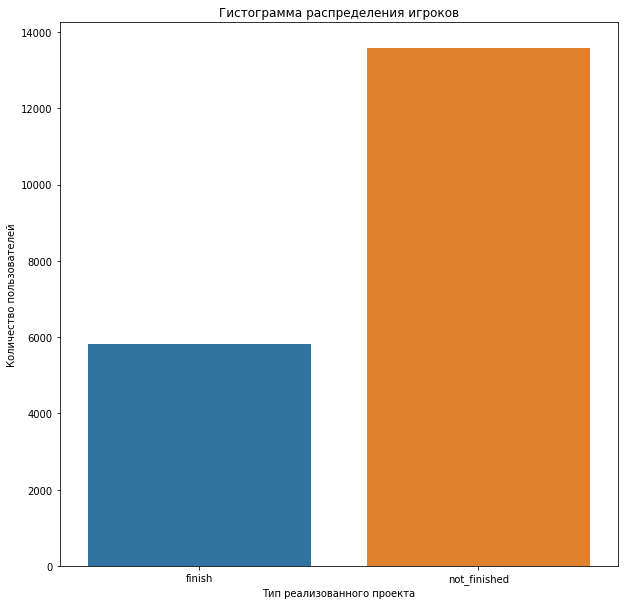

In [93]:
plt.figure(figsize=(10,10))
sns.barplot(data=finish_or_not_pivot, x='project_type', y='user_id')
plt.title('Гистограмма распределения игроков')
plt.xlabel('Тип реализованного проекта')
plt.ylabel('Количество пользователей')
plt.show();

### Общее количество пользователей.

In [26]:
users_count = game_actions['user_id'].nunique()
print('Количество уникальных пользователей в игре за изучаемый период:', users_count)

Количество уникальных пользователей в игре за изучаемый период: 13576


В период с 4 по 10 мая включительно в игру сырали 13576 уникальных пользователей. 

### Общее число событий. 

In [27]:
event_count = game_actions['event'].count()
print('Число совершенных игроками событий за изучаемый период:', event_count)

Число совершенных игроками событий за изучаемый период: 135639


### Среднее число событий, приходящихся на одного пользователя

In [28]:
print('Среднее количество событий на одного пользователя:', (event_count / users_count).round())

Среднее количество событий на одного пользователя: 10.0


В среднем один пользователь совершает 10 событий.

### Общее количество пользователей, завершивших первый уровень и в разрезе на два условия: победа над врагом иили реализация проекта. 

#### Игроки, победившие врага для перехода на следующий уровень.

In [29]:
builders = game_actions[game_actions['event'] == 'project']['user_id'].unique().tolist()

warriors = game_actions.query('user_id not in @builders and event == "finished_stage_1"')
warriors.head()

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,no_buildings,ced7b368-818f-48f6-9461-2346de0892c5,victory
13134,2020-05-05 13:22:09,finished_stage_1,no_buildings,7ef7fc89-2779-46ea-b328-9e5035b83af5,victory
15274,2020-05-05 18:54:37,finished_stage_1,no_buildings,70db22b3-c2f4-43bc-94ea-51c8d2904a29,victory
16284,2020-05-05 21:27:29,finished_stage_1,no_buildings,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,victory
19650,2020-05-06 06:02:22,finished_stage_1,no_buildings,58e077ba-feb1-4556-a5a0-d96bd04efa39,victory


In [30]:
print('Количество игроков, завершивших первый уровень победой над врагом:', warriors['user_id'].count())

Количество игроков, завершивших первый уровень победой над врагом: 3951


#### Игроки, завершившие первый уровень путем реализации проекта

In [31]:
projects = game_actions.query('user_id in @builders and event == "finished_stage_1"')
projects.head()

,event_datetime,event,building_type,user_id,project_type
64736,2020-05-10 02:37:50,finished_stage_1,no_buildings,9e57e5bb-49f4-4efb-991c-747d7a88e446,victory
69604,2020-05-10 10:30:22,finished_stage_1,no_buildings,e3c66498-9d45-4000-9392-f81e6796e7da,victory
72209,2020-05-10 14:40:04,finished_stage_1,no_buildings,a4491c86-c498-4f74-a56e-65c136d0e9a1,victory
79105,2020-05-11 02:10:33,finished_stage_1,no_buildings,9f63fad6-17b0-493f-938b-8d19e6d6c38c,victory
81341,2020-05-11 08:37:32,finished_stage_1,no_buildings,ee21905b-ab5a-44c6-9196-e5c9f8fada19,victory


In [32]:
print('Количество игроков, завершивших первый уровень путем реализации проекта:', projects['user_id'].count())

Количество игроков, завершивших первый уровень путем реализации проекта: 1866


In [33]:
len(set( projects['user_id']) & set(warriors['user_id']))

0

### Всего игроков, завершивших первый уровень

In [34]:
print('Всего игроков, завершивших первый уровень:', warriors['user_id'].count() + projects['user_id'].count())

Всего игроков, завершивших первый уровень: 5817


### Как пользователи предпочитают проходить первый уровень? 

In [35]:
warriors['type_of_victory'] = 'fight'
projects['type_of_victory'] = 'project'

finished_game = pd.concat([warriors, projects])

finished_game = finished_game.groupby('type_of_victory').agg({'user_id':'nunique'}).reset_index()
finished_game

,type_of_victory,user_id
0,fight,3951
1,project,1866


Визуализируем результат.

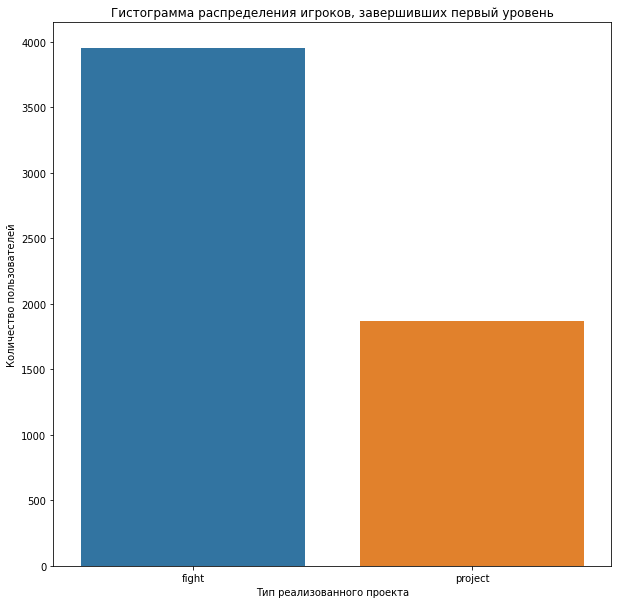

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(data=finished_game, x='type_of_victory', y='user_id')
plt.title('Гистограмма распределения игроков, завершивших первый уровень')
plt.xlabel('Тип реализованного проекта')
plt.ylabel('Количество пользователей')
plt.show();

Можем сделать вывод, игроки в основном предпочитают завершать первый уровень, победив своего первого врага, нежели реализовав проект. 

###  Количество пользователей, пришедших из каждого рекламного источника

In [37]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [38]:
traff = user_source.groupby('source').agg({'user_id':'nunique'})
traff.sort_values(by='user_id', ascending=False)

,user_id
source,
yandex_direct,4817
instagram_new_adverts,3347
facebook_ads,2726
youtube_channel_reklama,2686


Больше всего пользователей пришло из источника `yandex_direct` - 4817 человек. Меньше всего из `youtube_channel_reklama` - 2686. 

### Общая сумма расходов на маркетинг и как траты распределены по источникам.

In [39]:
ad_costs.head(5)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [40]:
print('Общая сумма расходов на маркетинг:', ad_costs['cost'].sum().round())

Общая сумма расходов на маркетинг: 7604.0


Теперь посмотрим как траты распределены по источникам трафика.

In [41]:
channel_cost = ad_costs.groupby('source').agg({'cost':'sum'}).round()
channel_cost.sort_values(by='cost', ascending=False)

,cost
source,
yandex_direct,2233.0
instagram_new_adverts,2161.0
facebook_ads,2141.0
youtube_channel_reklama,1068.0


Больше всего денег вкладывается в yandex_direct - 2233, на втором месте instagrem_new_adverts, далее facebook_ads и youtube_channel_reklama. 

## Рассчет метрик:

### LTV

Предложенная модель монетизации - всплывающая реклама при открытии меню постройки, то есть если человек зашел в меню постройки (event = building), получаем условные 0.07 центов за показ рекламы.

Добавим столбец с выручкой от показа рекламы в таблицу `game_actions`. 

In [42]:
def get_revenue(row):
    if row == 'building':
        return 0.07
    else:
        return 0
    
game_actions['income'] = game_actions['event'].apply(get_revenue)

In [43]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,income
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finished,0.07
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_finished,0.07
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_finished,0.07
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,not_finished,0.07
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,not_finished,0.07


Объединим таблицу с активностью пользователей с таблицей источников трафика, с которых они пришли. 

In [44]:
user_actions = game_actions.merge(user_source, on='user_id', how='left')
user_actions.head()

,event_datetime,event,building_type,user_id,project_type,income,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finished,0.07,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_finished,0.07,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_finished,0.07,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,not_finished,0.07,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,not_finished,0.07,yandex_direct


Отфильтруем ее по столбцу `income`, оставим в таблице только данные с просмотром рекламы. 

In [45]:
user_actions = user_actions.query('income != 0')

Также добавим в таблицу день, когда была просмотрена реклама. 

In [46]:
user_actions['ads_watch_day'] = user_actions['event_datetime'].astype('datetime64[D]')
user_actions.head()

,event_datetime,event,building_type,user_id,project_type,income,source,ads_watch_day
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finished,0.07,youtube_channel_reklama,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_finished,0.07,facebook_ads,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_finished,0.07,instagram_new_adverts,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,not_finished,0.07,facebook_ads,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,not_finished,0.07,yandex_direct,2020-05-04


Уберем лишние столбцы, которые не пригодятся нам в расчетах. 

In [47]:
ads = user_actions[['user_id', 'source', 'income', 'ads_watch_day']]
ads.head(10)

,user_id,source,income,ads_watch_day
0,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,0.07,2020-05-04
1,c07b1c10-f477-44dc-81dc-ec82254b1347,facebook_ads,0.07,2020-05-04
2,6edd42cc-e753-4ff6-a947-2107cd560710,instagram_new_adverts,0.07,2020-05-04
3,92c69003-d60a-444a-827f-8cc51bf6bf4c,facebook_ads,0.07,2020-05-04
4,cdc6bb92-0ccb-4490-9866-ef142f09139d,yandex_direct,0.07,2020-05-04
5,06c592ca-902d-42bb-bac3-75ce84cca159,instagram_new_adverts,0.07,2020-05-04
6,4fe0f101-694b-4e31-9740-d1d87f7208ea,facebook_ads,0.07,2020-05-04
7,beb8ca15-33a9-465d-b47b-89aa96f89c9a,yandex_direct,0.07,2020-05-04
8,65a92713-5969-48b1-8945-bfefa5063887,yandex_direct,0.07,2020-05-04
9,fa352362-d258-472c-b295-2796ccc39fa3,youtube_channel_reklama,0.07,2020-05-04


Получим день первого просмотра рекламы пользователем для дальнейшего определения лайфтайма когорт. 

In [48]:
first_watch_ads_day = ads.groupby(['user_id', 'source']).agg({'ads_watch_day':'min'}).reset_index()
first_watch_ads_day = first_watch_ads_day.rename(columns={'ads_watch_day':'first_watch'})
first_watch_ads_day

,user_id,source,first_watch
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,2020-05-05
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts,2020-05-04
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads,2020-05-04
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct,2020-05-04
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts,2020-05-04


Посчитаем количество новых пользователей, смотрящих рекламу за каждый день. 

In [49]:
amount = first_watch_ads_day.groupby(['source','first_watch']).agg({'user_id':'nunique'}).reset_index()
amount.head()

,source,first_watch,user_id
0,facebook_ads,2020-05-04,1184
1,facebook_ads,2020-05-05,694
2,facebook_ads,2020-05-06,345
3,facebook_ads,2020-05-07,224
4,facebook_ads,2020-05-08,139


Добавим дату первого просмотра рекламы в таблицу с информацией о рекламе. 

In [50]:
ads_new = ads.merge(first_watch_ads_day, on=['user_id','source'])
ads_new.head()

,user_id,source,income,ads_watch_day,first_watch
0,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,0.07,2020-05-04,2020-05-04
1,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,0.07,2020-05-05,2020-05-04
2,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,0.07,2020-05-05,2020-05-04
3,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,0.07,2020-05-05,2020-05-04
4,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,0.07,2020-05-06,2020-05-04


Сгруппируем таблицу с информацией о рекламе по источнику, датой первого и последующих просмотра рекламы и найдем суммарную выручку. 

In [51]:
ads_info = ads_new.groupby(['source', 'ads_watch_day','first_watch']).agg({'income':'sum'}).reset_index()
ads_info.head()

,source,ads_watch_day,first_watch,income
0,facebook_ads,2020-05-04,2020-05-04,115.99
1,facebook_ads,2020-05-05,2020-05-04,61.11
2,facebook_ads,2020-05-05,2020-05-05,69.37
3,facebook_ads,2020-05-06,2020-05-04,69.37
4,facebook_ads,2020-05-06,2020-05-05,40.74


In [52]:
#для лучшего визуального восприятия переместим столбец с первым просмотром рекламы влево от другой даты
ads_info = ads_info.reindex(columns=['source','first_watch','ads_watch_day','income'])
ads_info.head()

,source,first_watch,ads_watch_day,income
0,facebook_ads,2020-05-04,2020-05-04,115.99
1,facebook_ads,2020-05-04,2020-05-05,61.11
2,facebook_ads,2020-05-05,2020-05-05,69.37
3,facebook_ads,2020-05-04,2020-05-06,69.37
4,facebook_ads,2020-05-05,2020-05-06,40.74


Добавим размеры когорт. 

In [53]:
final = ads_info.merge(amount, on=['source', 'first_watch'])
final.head()

,source,first_watch,ads_watch_day,income,user_id
0,facebook_ads,2020-05-04,2020-05-04,115.99,1184
1,facebook_ads,2020-05-04,2020-05-05,61.11,1184
2,facebook_ads,2020-05-04,2020-05-06,69.37,1184
3,facebook_ads,2020-05-04,2020-05-07,72.24,1184
4,facebook_ads,2020-05-04,2020-05-08,83.16,1184


И посчитаем их лайфтайм.

In [54]:
final['lifetime'] = (final['ads_watch_day'] - final['first_watch']).dt.days
final.head()

,source,first_watch,ads_watch_day,income,user_id,lifetime
0,facebook_ads,2020-05-04,2020-05-04,115.99,1184,0
1,facebook_ads,2020-05-04,2020-05-05,61.11,1184,1
2,facebook_ads,2020-05-04,2020-05-06,69.37,1184,2
3,facebook_ads,2020-05-04,2020-05-07,72.24,1184,3
4,facebook_ads,2020-05-04,2020-05-08,83.16,1184,4


In [55]:
#переименуем столбец
final = final.rename(columns={'user_id':'users'})

Теперь мы можем посчитать LTV, поделив выручку на размер когорт. 

In [56]:
final['ltv'] = final['income'] / final['users']

final.head()

,source,first_watch,ads_watch_day,income,users,lifetime,ltv
0,facebook_ads,2020-05-04,2020-05-04,115.99,1184,0,0.097965
1,facebook_ads,2020-05-04,2020-05-05,61.11,1184,1,0.051613
2,facebook_ads,2020-05-04,2020-05-06,69.37,1184,2,0.058590
3,facebook_ads,2020-05-04,2020-05-07,72.24,1184,3,0.061014
4,facebook_ads,2020-05-04,2020-05-08,83.16,1184,4,0.070236


In [57]:
#отформатируем для корректного отображения на графике
final['first_watch'] = final['first_watch'].dt.strftime('%Y-%m-%d')

Визуализируем результат. 

In [58]:
final_pivot = final.pivot_table(index='first_watch', columns='lifetime', values='ltv', aggfunc='mean').round(2)

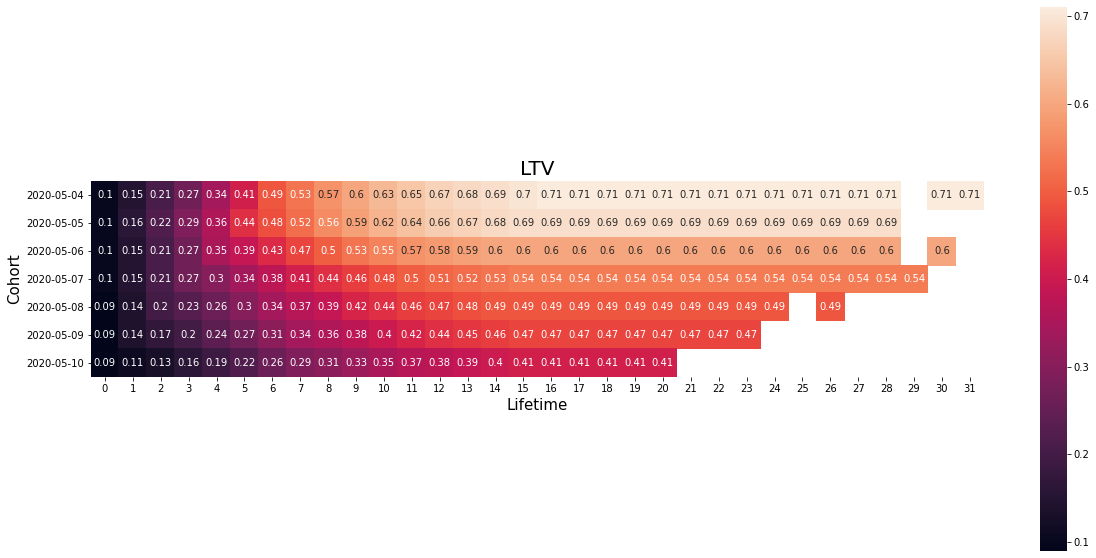

In [59]:
plt.figure(figsize=(20, 10))
plt.title('LTV', size=20)
sns.heatmap(final_pivot.cumsum(axis=1), annot=True, square=True)
plt.xlabel('Lifetime', size=15)
plt.ylabel('Cohort', size=15)
plt.show();

По графику видно, что наилучшим образом себя показывает когорта пользователей, пришедших 4 мая, далее с каждой группой показатели LTV снижаются. 

#### LTV в разбивке по рекламным источникам. 

In [60]:
#напишем функцию для дальнейших визуализаций

def heatmap(data, source):
    
    final_pivot = data.pivot_table(index='first_watch', columns='lifetime', values='ltv', aggfunc='mean').round(3) 
    
    plt.figure(figsize=(25, 5))
    plt.title('LTV ' + source, size=15)
    sns.heatmap(final_pivot.cumsum(axis=1), annot=True, fmt='.2f', square=True)
    plt.xlabel('Lifetime', size=15)
    plt.ylabel('Cohort', size=15)
    plt.show();

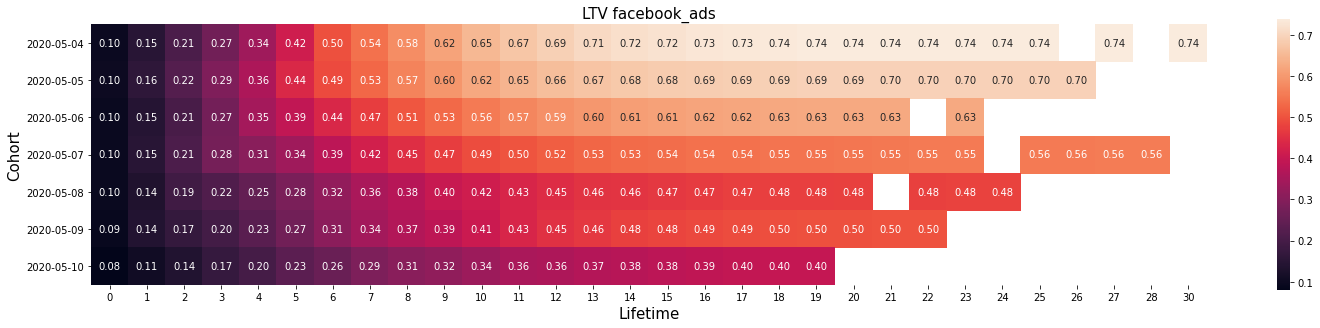

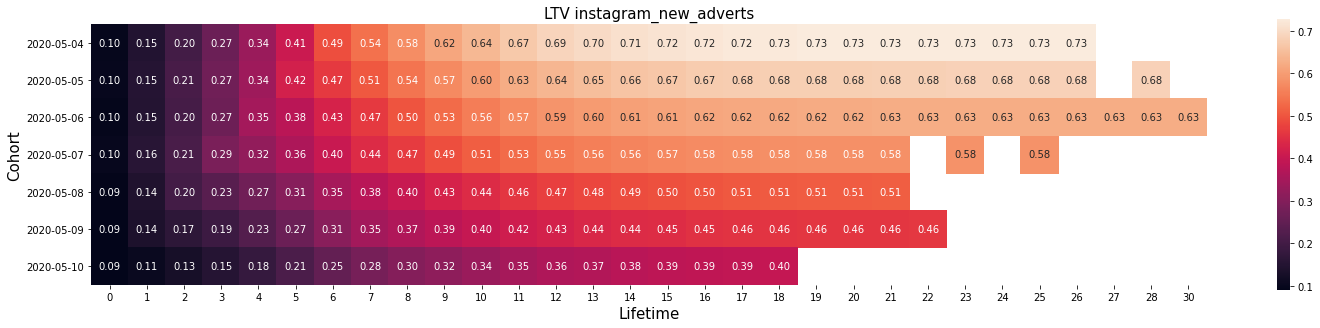

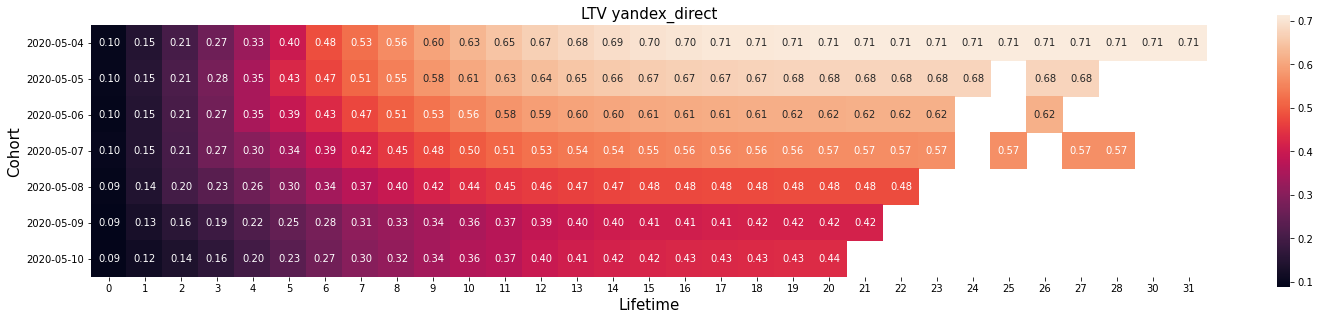

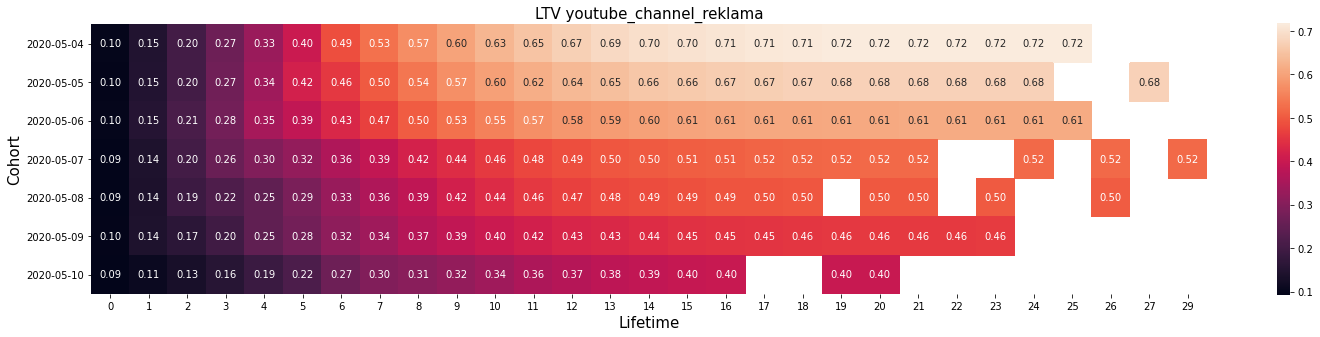

In [61]:
for source in final['source'].unique().tolist():
    heatmap(final[final['source'] == source], source)

Сложно выделить лидера по этой метрике, во всех четырех рекламных каналах ситуация похожа на общую по всем источникам. 

### CAC

In [62]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [63]:
#форматнем для объединения таблиц
ad_costs['day'] = ad_costs['day'].dt.strftime('%Y-%m-%d')

Добавим в таблицу final информацию о стоимости кликов и посчитаем CAC каждой когорты. 

In [64]:
final_new = final.merge(ad_costs, left_on=['source', 'first_watch'], right_on=['source', 'day'])
final_new['cac'] = final_new['cost'] / final_new['users']
final_new.head()

,source,first_watch,ads_watch_day,income,users,lifetime,ltv,day,cost,cac
0,facebook_ads,2020-05-04,2020-05-04,115.99,1184,0,0.097965,2020-05-04,548.35448,0.463137
1,facebook_ads,2020-05-04,2020-05-05,61.11,1184,1,0.051613,2020-05-04,548.35448,0.463137
2,facebook_ads,2020-05-04,2020-05-06,69.37,1184,2,0.058590,2020-05-04,548.35448,0.463137
3,facebook_ads,2020-05-04,2020-05-07,72.24,1184,3,0.061014,2020-05-04,548.35448,0.463137
4,facebook_ads,2020-05-04,2020-05-08,83.16,1184,4,0.070236,2020-05-04,548.35448,0.463137


Теперь посчитаем САС для каждого источника. 

Необходимые таблицы для расчета САС мы уже создали в пунктах 3.5 и 3.6. Воспользуемся ими. 

In [65]:
display(traff)
print()
channel_cost

,user_id
source,
facebook_ads,2726
instagram_new_adverts,3347
yandex_direct,4817
youtube_channel_reklama,2686


,cost
source,
facebook_ads,2141.0
instagram_new_adverts,2161.0
yandex_direct,2233.0
youtube_channel_reklama,1068.0


In [66]:
cac = channel_cost.merge(traff, on='source')
cac = cac.rename(columns={'user_id':'users_count'})
cac

,cost,users_count
source,,
facebook_ads,2141.0,2726
instagram_new_adverts,2161.0,3347
yandex_direct,2233.0,4817
youtube_channel_reklama,1068.0,2686


In [67]:
cac['cac'] = (cac['cost'] / cac['users_count']).round(2)
cac.sort_values(by='cac', ascending=False)

,cost,users_count,cac
source,,,
facebook_ads,2141.0,2726,0.79
instagram_new_adverts,2161.0,3347,0.65
yandex_direct,2233.0,4817,0.46
youtube_channel_reklama,1068.0,2686,0.40


Самая высокая стоимость привлечения одного клиента у `facebook_ads` - 0.79. Самая низкая у `youtube_channel_reklama` - 0.40. 

По CAC можем наблюдать двойку уверенных лидеров: `yandex_direct` и `youtube_channel_reklama`. Эти два канала имеют наименьшую стоимость привлечения клиентов. 

Стоит также отметить, что при вложениях в 1068, ютуб привлек целых 2686 пользователей, что всего на 30 меньше, чем у фейсбука, в которого вложили в 2 раза больше денег. Яндекс не отстает. Да, вложили в него больше остальных, однако и по привлечению клиентов он опережает всех своих конкурентов более чем на 1500 человек. 

### ROI

In [68]:
final_new.head()

,source,first_watch,ads_watch_day,income,users,lifetime,ltv,day,cost,cac
0,facebook_ads,2020-05-04,2020-05-04,115.99,1184,0,0.097965,2020-05-04,548.35448,0.463137
1,facebook_ads,2020-05-04,2020-05-05,61.11,1184,1,0.051613,2020-05-04,548.35448,0.463137
2,facebook_ads,2020-05-04,2020-05-06,69.37,1184,2,0.058590,2020-05-04,548.35448,0.463137
3,facebook_ads,2020-05-04,2020-05-07,72.24,1184,3,0.061014,2020-05-04,548.35448,0.463137
4,facebook_ads,2020-05-04,2020-05-08,83.16,1184,4,0.070236,2020-05-04,548.35448,0.463137


In [69]:
final_new['roi'] = final_new['ltv'] / final_new['cac']
final_new

,source,first_watch,ads_watch_day,income,users,lifetime,ltv,day,cost,cac,roi
0,facebook_ads,2020-05-04,2020-05-04,115.99,1184,0,0.097965,2020-05-04,548.354480,0.463137,0.211524
1,facebook_ads,2020-05-04,2020-05-05,61.11,1184,1,0.051613,2020-05-04,548.354480,0.463137,0.111443
2,facebook_ads,2020-05-04,2020-05-06,69.37,1184,2,0.058590,2020-05-04,548.354480,0.463137,0.126506
3,facebook_ads,2020-05-04,2020-05-07,72.24,1184,3,0.061014,2020-05-04,548.354480,0.463137,0.131740
4,facebook_ads,2020-05-04,2020-05-08,83.16,1184,4,0.070236,2020-05-04,548.354480,0.463137,0.151654
...,...,...,...,...,...,...,...,...,...,...,...
607,youtube_channel_reklama,2020-05-09,2020-05-28,0.21,100,19,0.002100,2020-05-09,23.314669,0.233147,0.009007
608,youtube_channel_reklama,2020-05-09,2020-05-29,0.07,100,20,0.000700,2020-05-09,23.314669,0.233147,0.003002
609,youtube_channel_reklama,2020-05-09,2020-05-30,0.14,100,21,0.001400,2020-05-09,23.314669,0.233147,0.006005
610,youtube_channel_reklama,2020-05-09,2020-05-31,0.07,100,22,0.000700,2020-05-09,23.314669,0.233147,0.003002


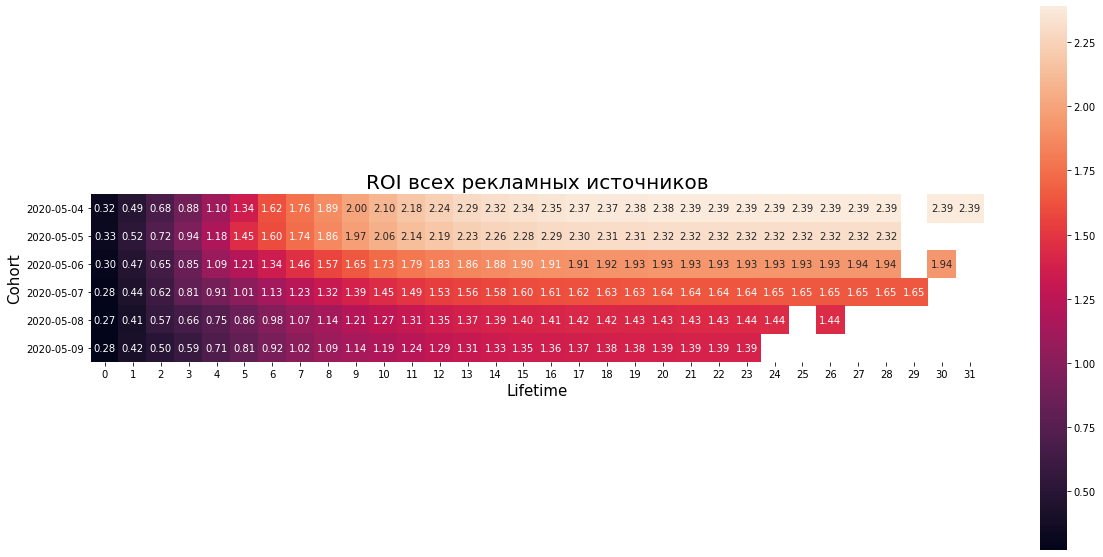

In [70]:
final_pivot2 = final_new.pivot_table(index='first_watch', columns='lifetime', values='roi', aggfunc='mean').round(3)

plt.figure(figsize=(20, 10))
plt.title('ROI всех рекламных источников', size=20)
sns.heatmap(final_pivot2.cumsum(axis=1), annot=True, fmt='.2f', square=True)
plt.xlabel('Lifetime', size=15)
plt.ylabel('Cohort', size=15)
plt.show();

Когорта от 4 числа снова показывает наилучший результат. Показатели остальных когорт  как и в случае с LTV постепенно снижаются. Стоит отметить довольно быструю окупаемость инвестиций, всего четыре дня потребовалось чтобы отбить затраты на привлечение пользователей для когорты от 4, 5 и 6 чисел. 

Взглянем на показатели ROI в разбивке на рекламные источники. 

#### ROI в разбивке по рекламным источникам

In [71]:
#немного изменим нашу функцию, заменим ltv на roi
def heatmap(data, source):
  
    final_pivot = data.pivot_table(index='first_watch', columns='lifetime', values='roi', aggfunc='mean').round(3) 
    
    plt.figure(figsize=(25, 5))
    plt.title('roi ' + source, size=15)
    sns.heatmap(final_pivot.cumsum(axis=1), annot=True, fmt='.2f', square=True)
    plt.xlabel('Lifetime', size=15)
    plt.ylabel('Cohort', size=15)
    plt.show();

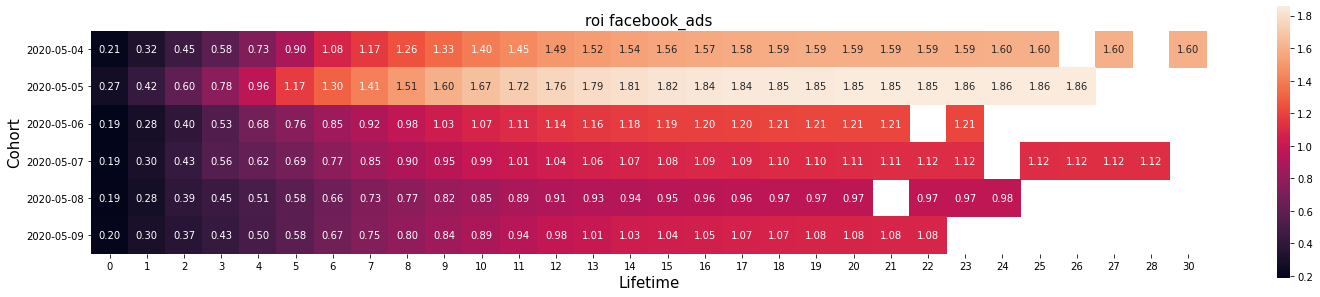

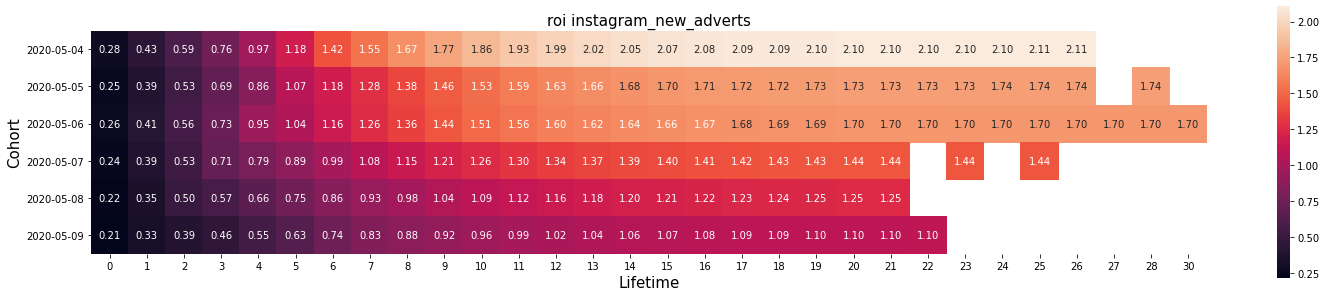

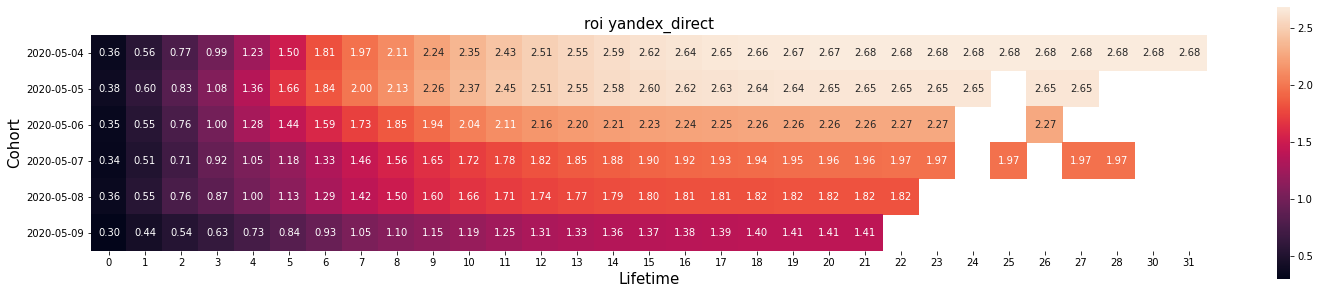

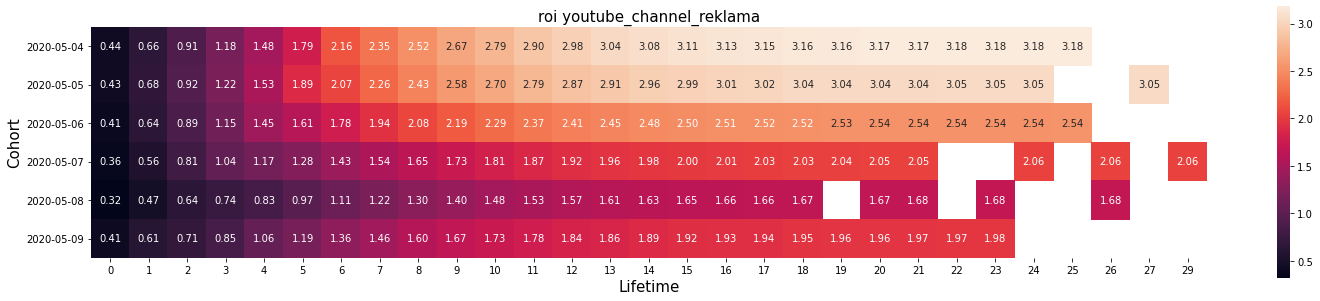

In [72]:
for source in final_new['source'].unique().tolist():
    heatmap(final_new[final_new['source'] == source], source)

По хитмэпам можно сделать следующие выводы:
- `все` рекламные источники окупаются
- однако лидеры по окупаемости все те же: яндекс и ютуб
- когорта от 4 числа яндекса, начиная с 6 лайфтайма окупается более чем в 2 раза
- когорта от 4 числа ютуба, начиная с 13, аж в три раза
- худшие показатели roi - у фейсбука

##  Проверка гипотез.

### Гипотеза 1

**Сформулируем гипотезу:**

Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта или через победу над первым игроком.

- Нулевая гипотеза - время завершения уровня не отличается.
- Альтернативная - различия есть.

Найдем время прохождения уровня игроков.

In [73]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,income
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finished,0.07
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_finished,0.07
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_finished,0.07
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,not_finished,0.07
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,not_finished,0.07


In [74]:
finish_players = game_actions.query('project_type != "not_finished"')['user_id']

In [75]:
end_time = (game_actions
            .query('user_id in @finish_players')
            .groupby('user_id')
            .agg({'event_datetime':['min','max']})
            .reset_index()
           )

In [76]:
end_time.head()

user_id      event_datetime  \
                                                        min   
0  001d39dc-366c-4021-9604-6a3b9ff01e25 2020-05-05 21:02:05   
1  003ee7e8-6356-4286-a715-62f22a18d2a1 2020-05-05 08:31:04   
2  004074f8-251a-4776-922c-8348dca1a2f6 2020-05-04 01:07:35   
3  00464e5e-28ed-4be6-bf44-517ef7b3937b 2020-05-04 08:35:29   
4  0056c007-c082-43cc-bdef-afc49bca4cb9 2020-05-10 11:49:47   

                       
                  max  
0 2020-05-12 07:40:47  
1 2020-05-17 21:47:49  
2 2020-05-16 19:57:40  
3 2020-05-15 16:02:01  
4 2020-05-16 13:48:39

In [77]:
end_time.columns = ['user_id', 'min','max']

In [78]:
end_time.head()

,user_id,min,max
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39


In [79]:
end_time['finish_time'] = end_time['max'] - end_time['min']
end_time.head()

,user_id,min,max,finish_time
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12 days 13:16:45
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12 days 18:50:05
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,11 days 07:26:32
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,6 days 01:58:52


In [80]:
print('Среднее время прохождения:', end_time['finish_time'].mean())

Среднее время прохождения: 11 days 20:37:59.561801616


In [81]:
end_time['finish_time'].median()

Timedelta('11 days 13:28:44')

Время завершения уровня выяснили, теперь разделим наших игроков на любителей PVP и PVE. 

In [82]:
finished_by_victory = game_actions[game_actions['project_type'] == 'victory']['user_id']
finished_by_project = game_actions[game_actions['project_type'] == 'satellite_orbital_assembly']['user_id']

In [83]:
victory = end_time.query('user_id in @finished_by_victory')
project = end_time.query('user_id in @finished_by_project')

Переведемвремя прохождения в часы для проверки гипотезы.

In [84]:
victory['finish_time_hours'] = victory['finish_time'] / np.timedelta64(1, 'h')
victory.head()

,user_id,min,max,finish_time,finish_time_hours
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6 days 10:38:42,154.645000
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12 days 13:16:45,301.279167
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12 days 18:50:05,306.834722
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,11 days 07:26:32,271.442222
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,6 days 01:58:52,145.981111


In [85]:
project['finish_time_hours'] = project['finish_time'] / np.timedelta64(1, 'h')
project.head()

,user_id,min,max,finish_time,finish_time_hours
7,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04 16:43:39,2020-05-16 11:22:33,11 days 18:38:54,282.648333
12,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08 21:57:44,2020-05-24 19:05:12,15 days 21:07:28,381.124444
13,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07 10:26:09,2020-05-27 11:38:47,20 days 01:12:38,481.210556
15,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04 07:48:50,2020-05-18 09:34:10,14 days 01:45:20,337.755556
16,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05 15:49:57,2020-05-20 09:35:04,14 days 17:45:07,353.751944


In [86]:
alpha = 0.05

#выборки не равны по размерам, используем параметр equal_var = False
results = st.ttest_ind(victory['finish_time_hours'], project['finish_time_hours'], equal_var = False)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 9.254500287187233e-59
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу об одинаковом времени прохождения первого уровня у игроков, победивших противника и игроков, реализовавших проект. Можем сделать вывод, что различия есть.  

### Гипотеза 2

**Сформулируем гипотезу:**

Рекламный источник не влияет на способ прохождения первого уровня. (Сравнение yandex_direct и facebook_ads)
- Нулевая - Способ прохождения уровня не зависит от рекламного источника.
- Альтернативная - Есть зависимость от рекламного источника.

Обратимся к нашим таблицам, созданным в пункте 3.4.1 и 3.4.2

In [87]:
display(warriors.head())
print()
projects.head()

,event_datetime,event,building_type,user_id,project_type,type_of_victory
6659,2020-05-04 19:47:29,finished_stage_1,no_buildings,ced7b368-818f-48f6-9461-2346de0892c5,victory,fight
13134,2020-05-05 13:22:09,finished_stage_1,no_buildings,7ef7fc89-2779-46ea-b328-9e5035b83af5,victory,fight
15274,2020-05-05 18:54:37,finished_stage_1,no_buildings,70db22b3-c2f4-43bc-94ea-51c8d2904a29,victory,fight
16284,2020-05-05 21:27:29,finished_stage_1,no_buildings,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,victory,fight
19650,2020-05-06 06:02:22,finished_stage_1,no_buildings,58e077ba-feb1-4556-a5a0-d96bd04efa39,victory,fight


,event_datetime,event,building_type,user_id,project_type,type_of_victory
64736,2020-05-10 02:37:50,finished_stage_1,no_buildings,9e57e5bb-49f4-4efb-991c-747d7a88e446,victory,project
69604,2020-05-10 10:30:22,finished_stage_1,no_buildings,e3c66498-9d45-4000-9392-f81e6796e7da,victory,project
72209,2020-05-10 14:40:04,finished_stage_1,no_buildings,a4491c86-c498-4f74-a56e-65c136d0e9a1,victory,project
79105,2020-05-11 02:10:33,finished_stage_1,no_buildings,9f63fad6-17b0-493f-938b-8d19e6d6c38c,victory,project
81341,2020-05-11 08:37:32,finished_stage_1,no_buildings,ee21905b-ab5a-44c6-9196-e5c9f8fada19,victory,project


Пусть игроки, победившие врага будут 1, а реализовавшие проект - 0. 

In [88]:
warriors['finish_style'] = 1
projects['finish_style'] = 0

Объединим таблицы и добавим информацию о рекламном источнике. 

In [89]:
gamers = pd.concat([warriors, projects])
gamers.head()

,event_datetime,event,building_type,user_id,project_type,type_of_victory,finish_style
6659,2020-05-04 19:47:29,finished_stage_1,no_buildings,ced7b368-818f-48f6-9461-2346de0892c5,victory,fight,1
13134,2020-05-05 13:22:09,finished_stage_1,no_buildings,7ef7fc89-2779-46ea-b328-9e5035b83af5,victory,fight,1
15274,2020-05-05 18:54:37,finished_stage_1,no_buildings,70db22b3-c2f4-43bc-94ea-51c8d2904a29,victory,fight,1
16284,2020-05-05 21:27:29,finished_stage_1,no_buildings,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,victory,fight,1
19650,2020-05-06 06:02:22,finished_stage_1,no_buildings,58e077ba-feb1-4556-a5a0-d96bd04efa39,victory,fight,1


In [90]:
df = gamers.merge(user_source, on='user_id', how='left')
df.head()

,event_datetime,event,building_type,user_id,project_type,type_of_victory,finish_style,source
0,2020-05-04 19:47:29,finished_stage_1,no_buildings,ced7b368-818f-48f6-9461-2346de0892c5,victory,fight,1,instagram_new_adverts
1,2020-05-05 13:22:09,finished_stage_1,no_buildings,7ef7fc89-2779-46ea-b328-9e5035b83af5,victory,fight,1,facebook_ads
2,2020-05-05 18:54:37,finished_stage_1,no_buildings,70db22b3-c2f4-43bc-94ea-51c8d2904a29,victory,fight,1,youtube_channel_reklama
3,2020-05-05 21:27:29,finished_stage_1,no_buildings,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,victory,fight,1,youtube_channel_reklama
4,2020-05-06 06:02:22,finished_stage_1,no_buildings,58e077ba-feb1-4556-a5a0-d96bd04efa39,victory,fight,1,facebook_ads


In [91]:
yandex_direct = df[df['source'] == 'yandex_direct']['finish_style']
facebook_ads = df[df['source'] == 'facebook_ads']['finish_style']

In [92]:
alpha = 0.05

results = st.ttest_ind(yandex_direct, facebook_ads, equal_var = False)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.03548089997991592
Отвергаем нулевую гипотезу


Гипотеза о независимости рекламного источника на способ прохождения отвергнута. Следовательно, зависимость геймплея от рекламного источника есть.

## Вывод

В результате исследования мы выяснили, что:
- количество уникальных пользователей в игре за изучаемый период: `13576`;
- число совершенных игроками событий за изучаемый период: `135639`;
- среднее количество событий, приходящихся на одного пользователя: `10`;
- первый уровень завершили `5817` пользователя, `1866` из которых выбрали путь реализации проекта, а `3951` - победу над первым врагом; 
- среднее время прохождения первого уровня: 11 дней 20 часов (довольно много); 
- больше всего пользователей пришло из `yandex_direct` - `4817` человек. меньше всего из `youtube_channel_reklama` - `2686`;
- сумма, потраченная на маркетинг - `7604`
- траты по источникам трафика:
    - yandex_direct	- `2233`
    - instagram_new_adverts - `2161`
    - facebook_ads - `2141`
    - youtube_channel_reklama - `1068`
- LTV всех четырех источников примерно одинаковый на протяжении всего лайфтайма;
- `все рекламные источники окупаются`, однако явно выделяются два лидера: `yandex_direct` и  `youtube_channel_reklama`, худшие показатели окупаемости - у `facebook_ads`;
- по САС в лидерах также `yandex_direct` (0.46) и  `youtube_channel_reklama` (0.40), стоимость привлечения одного клиента у их конкурентов - 0.79 для `facebook_ads` и 0.65 для `instagram_new_adverts`.

Также благодаря проверке гипотез мы выяснили:
- время завершения уровня `различается` в зависимости способа прохождения: через реализацию проекта или через победу над первым игроком;
- существует зависимость способа прохождения от рекламного источника (возможно это из-за рекламной кампании яндекса и фейсбука, может один источник показывал рекламу с пве, другой с пвп или в менталитете пользователей, скорее всего яндекс ориентирован на снг комьюнити, а фейсбук - на зарубежную аудиторию)

В итоге можем сделать вывод, что самыми перспективными рекламными источниками являются `yandex_direct` и  `youtube_channel_reklama`. 

Предложенная модель монетизации - всплывающая реклама при постройке, отлично подходит для нашей игры, тк все пользователи заходили в меню постройки. Я бы рекомендовал сделать ее не слишком навязчивой и добавить возможность закрыть ее спустя несколько секунд просмотра, чтобы не сильно раздражать ей наших игроков.  